In [76]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
mfile=loadmat('olivettifaces.mat')
faces = mfile['faces'].T.copy()
faces = np.float32(faces)
faces = faces - faces.min()
faces /= faces.max()
faces = faces.reshape((400, 64, 64)).transpose(0, 2, 1)
target = np.array([i // 10 for i in range(400)])
faces_vectorized = faces.reshape(len(faces), -1)

Populating the interactive namespace from numpy and matplotlib


/home/erohar/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['select', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [77]:
print(faces_vectorized.shape)
print(target.shape)


(400, 4096)
(400,)


In [78]:
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

1.0
0.0
0.5470426


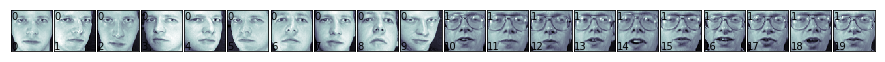

In [79]:
def print_faces(images,target , top_n):
    ##set up figure size in inches
    fig=plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0 , right=1 ,bottom=0, top=1, hspace=0.05,wspace=0.05)
    for  i in range(top_n):
        #we will print images in matrix 20x20
        p=fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i],cmap=plt.cm.bone)
        #label the image with target value
        p.text(0,14,str(target[i]))
        p.text(0,60,str(i))
        
print_faces(faces,target,20)
    

In [80]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print (svc_1)

SVC(kernel='linear')


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        faces_vectorized, target, test_size=0.25, random_state=0)

In [51]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator
    cv = KFold(K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores)))

In [52]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[0.93333333 0.86666667 0.91666667 0.93333333 0.91666667]
Mean score: 0.913 (+/-0.012)


In [53]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [54]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         

In [55]:
# the index ranges of images of people with glasses
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

In [59]:
def create_target(segments):
    # create a new y array of target size initialized with zeros
    y = np.zeros(target.shape[0])
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [60]:
target_glasses = create_target(glasses)

X_train, X_test, y_train, y_test = train_test_split(
        faces_vectorized, target_glasses, test_size=0.25, random_state=0)

In [61]:
svc_2 = SVC(kernel='linear')
evaluate_cross_validation(svc_2, X_train, y_train, 5)
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

[1.         0.95       0.98333333 0.98333333 0.93333333]
Mean score: 0.970 (+/-0.012)
Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


In [68]:
X_test = faces_vectorized[30:40]
y_test = target_glasses[30:40]

print (y_test.shape[0])

select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces_vectorized[select == 1]
y_train = target_glasses[select == 1]

print (y_train.shape[0])

10
390


In [69]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)
y_pred = svc_3.predict(X_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion Matrix:
[[5 0]
 [1 4]]


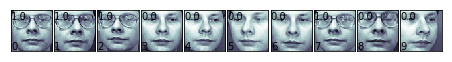

In [70]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear','poly','rbf','sigmoid']}

In [89]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)

In [90]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


/home/erohar/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.933, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.950, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.917, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.967, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.933, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.917, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.950, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.917, total=   0.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.967, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.933, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.950, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.917, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.967, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.933, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.133, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.133, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .

[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.017, total=   0.7s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.033, total=   0.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.933, total=   0.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.950, total=   0.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.917, total=   0.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.967, total=   0.7s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.933, total=   0.7s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.017, total=   0.7s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.117, total=   0.7s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.050, total=   0.7s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.100, total=   0.7s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.933, total=   0.7s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.950, total=   0.7s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.917, total=   0.7s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.333, total=   0.8s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.017, total=   0.7s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.017, total=   0.7s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.033, total=   0.7s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.017, total=   0.7s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ..... C=10, gamma=0.1, kernel=sigmoid, score=0.033, total=   0.7s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.933, total=   0.7s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .

[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.250, total=   0.8s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.167, total=   0.8s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.183, total=   0.8s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.133, total=   0.7s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.133, total=   0.7s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.167, total=   0.7s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.133, total=   0.7s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.917, total=   0.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.900, total=   0.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.900, total=   0.8s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.967, total=   0.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.933, total=   0.9s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.050, total=   0.7s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.000, total=   0.8s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[CV] ........ C=1000, gamma=1, kernel=poly, score=0.967, total=   0.8s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV] ........ C=1000, gamma=1, kernel=poly, score=0.933, total=   0.7s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.033, total=   0.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.050, total=   0.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.050, total=   0.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.100, total=   0.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.033, total=   0.8s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] .

[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.950, total=   0.7s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.917, total=   0.7s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.967, total=   0.7s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV] .... C=1000, gamma=0.001, kernel=poly, score=0.933, total=   0.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.933, total=   0.8s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.933, total=   0.8s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.917, total=   0.8s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.2min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [98]:
best_score, best_score_id = grid.cv_results_['mean_test_score'].max(),grid.cv_results_['mean_test_score'].argmax()
best_hyperparams = grid.cv_results_['params'][best_score_id]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9400000000000001 corresponding to hyperparameters {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [101]:
model = SVC(C=0.1, kernel='linear')

In [102]:
train_and_evaluate(model,X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         

In [126]:
from sklearn.linear_model import LogisticRegression
param_grid_logistic = {'C': [0.01,0.1,1, 10, 100, 1000], 'l1_ratio':[0,0.25,0.5,0.75,1] }
grid_logistic = GridSearchCV(LogisticRegression(n_jobs=4,tol=1e-3,solver='saga',penalty='elasticnet'),param_grid_logistic,refit=True,verbose=3,cv=4)

In [127]:
grid_logistic.fit(X_train,y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV] C=0.01, l1_ratio=0 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. C=0.01, l1_ratio=0, score=0.653, total=  12.1s
[CV] C=0.01, l1_ratio=0 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s


[CV] .................. C=0.01, l1_ratio=0, score=0.720, total=  11.5s
[CV] C=0.01, l1_ratio=0 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.6s remaining:    0.0s


[CV] .................. C=0.01, l1_ratio=0, score=0.707, total=  11.6s
[CV] C=0.01, l1_ratio=0 ..............................................
[CV] .................. C=0.01, l1_ratio=0, score=0.707, total=  12.1s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.027, total=   1.9s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.027, total=   1.4s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.027, total=   1.3s
[CV] C=0.01, l1_ratio=0.25 ...........................................
[CV] ............... C=0.01, l1_ratio=0.25, score=0.027, total=   1.1s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] ................ C=0.01, l1_ratio=0.5, score=0.027, total=   0.5s
[CV] C=0.01, l1_ratio=0.5 ............................................
[CV] .

[CV] .................... C=10, l1_ratio=0, score=0.920, total=  21.8s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.893, total=  22.1s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.947, total=  21.9s
[CV] C=10, l1_ratio=0 ................................................
[CV] .................... C=10, l1_ratio=0, score=0.947, total=  21.9s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.933, total=  38.1s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.907, total=  38.0s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] ................. C=10, l1_ratio=0.25, score=0.947, total=  38.1s
[CV] C=10, l1_ratio=0.25 .............................................
[CV] .

[CV] .................. C=1000, l1_ratio=1, score=0.947, total=  33.3s
[CV] C=1000, l1_ratio=1 ..............................................
[CV] .................. C=1000, l1_ratio=1, score=0.947, total=  32.1s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 49.6min finished
/home/erohar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=4,
             estimator=LogisticRegression(n_jobs=4, penalty='elasticnet',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             verbose=3)

In [128]:
best_score_logistic, best_score_id_logistic = grid_logistic.cv_results_['mean_test_score'].max(),grid_logistic.cv_results_['mean_test_score'].argmax()
best_hyperparams_logistic = grid_logistic.cv_results_['params'][best_score_id_logistic]

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_logistic, best_hyperparams_logistic))

The best test score is 0.9333333333333333 corresponding to hyperparameters {'C': 10, 'l1_ratio': 0.25}


In [129]:
model_log = LogisticRegression(tol=1e-3, solver='saga', penalty='elasticnet', C=10, l1_ratio=0.25)
train_and_evaluate(model_log,X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       0.67      0.67      0.67         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         

/home/erohar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
